<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 - Kevin Camilo Becerra Walteros (201812779)

MINE-4101: Ciencia de Datos Aplicada  
Universidad de los Andes  

**Dataset:** AirBnb Listings - Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. Este dataset incluye información sobre propiedades listadas en Airbnb en la Ciudad Autónoma de Buenos Aires. Contiene puntos de datos como barrio, tipo de propiedad, precio por noche, número de reseñas, puntuaciones de reseñas, disponibilidad, amenidades y más.

**Contexto de negocio:** Estrategia de inversión inmobiliaria y alquiler vacacional. Eres consultor para individuos y empresas interesados en invertir en propiedades para alquileres en Airbnb. Quieren identificar los barrios más rentables, las estrategias de precios óptimas y comprender los factores que contribuyen a obtener reseñas positivas y reservas frecuentes.

In [494]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [495]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Carga de datos

In [496]:
# Cargar el archivo CSV como un dataframe con encoding UTF-8 y separador por comas
listings_df = pd.read_csv('./listings.csv', encoding = "UTF-8", sep = ',')

A continuación se previsualiza una muestra aleatoria de 5 registros:

In [497]:
# Showing a sample of n rows
listings_df.sample(5) 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10908,53660667,https://www.airbnb.com/rooms/53660667,20240629050041,2024-06-30,city scrape,* Palermo Park * Lovely duplex at Cerviño Blvd.,Lovely duplex steps away from Cerviño Boulevar...,Palermo is the biggest neighborhood in town. I...,https://a0.muscache.com/pictures/4ff79381-3418...,74885919,https://www.airbnb.com/users/show/74885919,Be Local,2016-05-30,"Buenos Aires, Argentina",We are a Property Management Company specializ...,NaN,NaN,100%,t,https://a0.muscache.com/im/pictures/user/9de72...,https://a0.muscache.com/im/pictures/user/9de72...,NaN,90.0,132.0,"['email', 'phone']",t,t,"Palermo, Buenos Aires, Argentina",Palermo,NaN,-34.579940,-58.414580,Entire condo,Entire home/apt,4,1.5,1.5 baths,1.0,1.0,"[""Elevator"", ""Kitchen"", ""Wifi"", ""Dishes and si...","$22,763.00",1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,26,56,86,361,2024-06-30,62,12,1,2021-12-19,2024-06-02,4.71,4.76,4.84,4.85,4.90,4.92,4.63,NaN,t,81,81,0,0,2.01
28995,1049772805159561216,https://www.airbnb.com/rooms/1049772805159561216,20240629050041,2024-06-29,city scrape,Almagro Bright & Cozy Flat,Immerse yourself in vibrant Buenos Aires from...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4652337,https://www.airbnb.com/users/show/4652337,Jimena,2013-01-10,"Buenos Aires, Argentina",Hi My name is Jimena I live in Bs As/ Argentin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/4652337/profi...,https://a0.muscache.com/im/users/4652337/profi...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Almagro,NaN,-34.604791,-58.419855,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Refrigerator"", ""Air conditioning"", ""Washer"",...","$37,149.00",3,30,3,3,30,30,3.0,30.0,NaN,t,29,59,89,269,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
27611,1026132000669359842,https://www.airbnb.com/rooms/1026132000669359842,20240629050041,2024-06-29,city scrape,Departament galerías pacífico,"Super well located apartment, with fences supe...",downtown,https://a0.muscache.com/pictures/miso/Hosting-...,546816756,https://www.airbnb.com/users/show/546816756,Rocio,2023-11-16,NaN,NaN,NaN,NaN,92%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,3.0,['phone'],f,t,"Buenos Aires, Argentina",San Nicolas,NaN,-34.601501,-58.372431,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Trash compactor"", ""Elevator"", ""Kitchen"", ""Cl...","$24,712.00",2,365,2,2,365,365,2.0,365.0,NaN,t,30,60,90,270,2024-06-29,5,5,0,2023-11-24,2024-01-16,4.80,4.80,4.80,5.00,5.00,5.00,4.80,NaN,t,1,1,0,0,0.68
8932,42434299,https://www.airbnb.com/rooms/42434299,20240629050041,2024-06-29,city scrape,Recoleta Studio a 1 cuadra de

## 2. Entendimiento inicial de los datos
Generar un breve reporte de entendimiento inicial de datos en donde destaque las dimensiones del dataset, los tipos de datos que contiene y el top 5 de los atributos que considera más importantes para el análisis. Por cada uno de los 5 atributos incluya algunos elementos básicos de su comportamiento o distribución (análisis univariado).

Se abordarán los siguientes items:

* Exploración y perfilamiento de datos
    * Carga
    * Descripción básica
    * Perfilamiento
    * Visualización
    
* Calidad de datos e ideas de preparación
  * Completitud
  * Unicidad / Duplicidad
  * Validez / Estandarizacón


In [498]:
# Dimensiones del dataset
listings_df.shape

(37035, 75)

Se tienen 37035 registros, en este caso propiedades, y 75 columnas en total.

In [499]:
# Columnas que contiene el dataset
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [500]:
# Se muestran los tipos de datos de las columnas
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [501]:
# Se muestran el número de valores únicos de ids, que nos puede ayudar para diagnosticar duplicados
listings_df["id"].nunique()

37035

Notamos que el número de ids únicos coincide con el número total de registros. Por lo tanto, decimos que no hay registros duplicados.

Ahoram, revisamos la cantidad de no nulos que tiene cada atributo.

In [502]:
# Atributos con tipo de dato asociado y su número de no nulos
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37035 entries, 0 to 37034
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37035 non-null  int64  
 1   listing_url                                   37035 non-null  object 
 2   scrape_id                                     37035 non-null  int64  
 3   last_scraped                                  37035 non-null  object 
 4   source                                        37035 non-null  object 
 5   name                                          37035 non-null  object 
 6   description                                   36014 non-null  object 
 7   neighborhood_overview                         18958 non-null  object 
 8   picture_url                                   37034 non-null  object 
 9   host_id                                       37035 non-null 

In [503]:
# Usamos esta función para saber el porcentaje de datos nulos en cada atributo
(listings_df.isnull().sum()/len(listings_df))*100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
source                                            0.000000
name                                              0.000000
description                                       2.756852
neighborhood_overview                            48.810585
picture_url                                       0.002700
host_id                                           0.000000
host_url                                          0.000000
host_name                                         0.005400
host_since                                        0.005400
host_location                                    22.573242
host_about                                       47.190495
host_response_time                               19.929796
host_response_rate                               19.9297

Notamos que hay 3 columnas con datos nulos significativos (>90%). 

De acuerdo con esto, se eliminarán las siguientes columnas ya que no tiene sentido imputarlas y tampoco aportan mucho a nuestro análisis: neighbourhood_group_cleansed, calendar_updated, license.

In [504]:
columns_to_drop = ['neighbourhood_group_cleansed', 'calendar_updated', 'license']
listings_df.drop(columns=columns_to_drop, inplace=True)

textoooo

In [505]:
# Lista de columnas seleccionadas
selected_columns = [
    'name', 'description', 'neighborhood_overview', 'host_id', 'latitude', 'longitude',
    'property_type', 'room_type', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
    'amenities', 'price', 'number_of_reviews', 'reviews_per_month', 'instant_bookable',
    'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'review_scores_rating', 'neighbourhood_cleansed'                            
]

# Seleccionamos las columnas que se necesitan
listings_df = listings_df[selected_columns]

Para el propósito del taller solo se necesitan elegir los 5 atributos más importantes o de mayor relevancia para poder sugerir decisiones basadas en datos a través del análisis estadístico. Se eligieron:
* neighbourhood_cleansed
* property_type
* price
* number_of_reviews
* review_scores_rating

In [506]:
columns_stat_analysis = ['neighbourhood_cleansed', 'property_type', 'price', 'number_of_reviews', 'review_scores_rating']
listings_df = listings_df[columns_stat_analysis]

In [507]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37035 entries, 0 to 37034
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  37035 non-null  object 
 1   property_type           37035 non-null  object 
 2   price                   34005 non-null  object 
 3   number_of_reviews       37035 non-null  int64  
 4   review_scores_rating    29760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [508]:
listings_df.isnull().sum()

neighbourhood_cleansed       0
property_type                0
price                     3030
number_of_reviews            0
review_scores_rating      7275
dtype: int64

Notamos que existen problemas de completitud con las variables 'review_scores_ratings' y 'price'. 

* Revisando la variable 'review_scores_rating' vemos que los registros nulos corresponden a cuyo número de reviews es 0. Por lo tanto, aplicaremos una estrategia de imputación por categoría, es decir, los valores nulos se reemplazarán con la mediana del score para las localidades con el mismo barrio (neighbourhood_cleansed) realizaremos esto con las funciones 'groupby()', 'median()' y 'apply()' de pandas.

* Con respecto a la variable 'price' vemos que las propiedades tienen buenas calificaciones y parecen ser bien valoradas, por lo cual se considera imputar los precios nulos con la mediana de price en función de cada combinación de barrio y tipo de propiedad. Con el fin de mantener la información en el dataset sin perder registros y a su vez puede ser más representativo que usar una sola mediana global.

In [509]:
#Calcular la media de 'review_scores_rating' por cada grupo de 'neighbourhood_cleansed'
median_by_neighbourhood_cleansed = listings_df.groupby('neighbourhood_cleansed')['review_scores_rating'].median()


#Llenar los valores nulos en 'review_scores_rating' basado en la mediana de los valores por cada 'neighbourhood_cleansed' agrupado
listings_df['review_scores_rating'] = listings_df.apply(
    lambda row: median_by_neighbourhood_cleansed[row['neighbourhood_cleansed']] if pd.isnull(row['review_scores_rating']) else row['review_scores_rating'],
    axis=1
)

In [510]:
# Verificamos los barrios con score review ratings nulos y sus conteos
null_count_by_neighbourhood_cleansed = listings_df[listings_df['review_scores_rating'].isnull()]['neighbourhood_cleansed'].value_counts()
print(null_count_by_neighbourhood_cleansed)

neighbourhood_cleansed
Villa Riachuelo    4
Villa Soldati      1
Name: count, dtype: int64


De acuerdo con esto, eliminamos estos dos barrios ('Villa Riachuelo', 'Villa Soldati') porque las propiedades que están ahí no tienen reviews y también porque no es un valor tan significativo dentro del dataset.

In [511]:
# Eliminar registros con 'review_scores_rating' nulo
listings_df = listings_df.dropna(subset=['review_scores_rating'])

In [512]:
# Verificamos que no hayan más nulos en la columna 'review_scores_rating'
listings_df.isnull().sum()

neighbourhood_cleansed       0
property_type                0
price                     3027
number_of_reviews            0
review_scores_rating         0
dtype: int64

In [513]:
# Filtramos las filas con 'price' nulo
null_price = listings_df[listings_df['price'].isnull()]

# Contar la distribución por barrio
null_distribution = null_price['neighbourhood_cleansed'].value_counts()

# Mostrar la distribución de precios nulos por barrio
print("Distribución de precios nulos por barrio:")
print(null_distribution)

Distribución de precios nulos por barrio:
neighbourhood_cleansed
Palermo              766
Recoleta             491
Retiro               188
Belgrano             169
Monserrat            145
Almagro              141
San Nicolas          138
Balvanera            135
Nuñez                101
San Telmo             89
Caballito             87
Villa Crespo          80
Colegiales            76
Constitucion          67
Chacarita             46
Villa Urquiza         45
San Cristobal         31
Saavedra              30
Puerto Madero         27
Boca                  15
Boedo                 15
Coghlan               14
Villa Ortuzar         14
Barracas              14
Flores                13
Parque Chacabuco      10
Parque Patricios       9
Villa Del Parque       8
Villa Devoto           7
Paternal               7
Villa Santa Rita       5
Villa Real             5
Villa Gral. Mitre      5
Floresta               4
Parque Chas            4
Villa Luro             4
Liniers                4
Villa Puey

Para poder analizarla y proceder con lo que planteamos, se debe convertir su datatype, de object a float; esto con el fin de poder analizar posteriormente su comportamiento como variable numérica y no como categórica.

In [514]:
# Se crea la columna con el valor del precio en tipo float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
# Se elimina la columna original del dataframe
listings_df = listings_df.drop("price", axis=1)

In [515]:
# Calcular la mediana de 'price_float' por combinación de barrio y tipo de propiedad
median_by_group = listings_df.groupby(['neighbourhood_cleansed', 'property_type'])['price_float'].median()

# Llenar los valores nulos en 'price_float' basado en la mediana correspondiente
listings_df['price_float'] = listings_df.apply(
    lambda row: median_by_group[row['neighbourhood_cleansed'], row['property_type']] if pd.isnull(row['price_float']) else row['price_float'],
    axis=1
)

# Verificar si hay más nulos en 'price_float'
nulos_restantes = listings_df['price_float'].isnull().sum()
print(f"Número de precios nulos restantes: {nulos_restantes}")

Número de precios nulos restantes: 62


In [516]:
# Filtrar los registros con precios nulos después de la imputación
muestra_nulos = listings_df[listings_df['price_float'].isnull()]

# Mostrar una muestra de los registros con precios nulos
print(muestra_nulos[['neighbourhood_cleansed', 'property_type', 'price_float', 'review_scores_rating', 'number_of_reviews']].head())  # Muestra de los primeros 10 registros

    neighbourhood_cleansed           property_type  price_float  \
253              San Telmo   Shared room in hostel          NaN   
276              San Telmo            Private room          NaN   
277              San Telmo            Private room          NaN   
289               Belgrano  Private room in hostel          NaN   
304              San Telmo            Private room          NaN   

     review_scores_rating  number_of_reviews  
253                 4.480                 41  
276                 4.670                  4  
277                 5.000                  2  
289                 4.900                  0  
304                 4.845                  0  


Después de hacer la imputación por mediana de acuerdo a cada combinación de barrio por tipo de propiedad, notamos que siguen habiendo 62 valores de precio nulos. Esto puede suceder debido a que tal vez hayan combinaciones específicas de 'neighbourhood_cleansed' y 'property_type' que no tengan ningún registro con un valor de 'price_float'; ya que si se intenta acceder a una combinación que no existe en median_by_group, se generará un error que no se muestra, y los nulos permanecerán.

Por lo tanto, sabiendo que es un valor pequeño (0.1%) que no afectará significativamente nuestro análisis, procedemos a borrar estos registros.

In [517]:
#Paso 3: Eliminar las filas con 'price_float' nulo
listings_df = listings_df.dropna(subset=['price_float'])

# Verificamos el nuevo tamaño del DataFrame
print(f"Tamaño del DataFrame después de eliminar nulos en 'price_float': {len(listings_df)}")

Tamaño del DataFrame después de eliminar nulos en 'price_float': 36968


In [518]:
# Imprimimos una muestra del dataframe con el que se trabajará el análisis
listings_df.sample(10)

,neighbourhood_cleansed,property_type,number_of_reviews,review_scores_rating,price_float
8435,Palermo,Entire rental unit,171,4.58,34600.0
36457,Palermo,Entire rental unit,2,5.00,30175.0
5153,Palermo,Private room in home,1,5.00,13658.0
27560,Palermo,Entire condo,8,5.00,33689.0
34235,Palermo,Private room in rental unit,5,5.00,12620.0
36049,Recoleta,Entire rental unit,1,5.00,17482.0
16503,Palermo,Entire rental unit,4,4.75,54632.0
14483,Palermo,Private room in condo,58,4.86,13658.0
29930,Colegiales,Entire condo,6,5.00,23938.0
20221,San Nicolas,Entire rental unit,0,4.85,31349.0


In [519]:
listings_df.isna().sum()/len(listings_df)

neighbourhood_cleansed    0.0
property_type             0.0
number_of_reviews         0.0
review_scores_rating      0.0
price_float               0.0
dtype: float64

Las imputaciones se realizaron de manera satisfactorio. Finalmente, podemos decir que ser ha garantizado a lo largo del análisis preliminar la unicidad, validez y completitud de los datos. Por lo tanto, empezaremos con el análisis univariado.

## 2.1 Análisis univariado

## Variables categóricas
**1. Atributo Barrio ('neighbourhood_cleansed')**

In [520]:
listings_df["neighbourhood_cleansed"].unique()

array(['Palermo', 'Nuñez', 'Monserrat', 'Constitucion', 'San Nicolas',
       'Chacarita', 'Recoleta', 'Belgrano', 'Retiro', 'San Telmo',
       'Almagro', 'Villa Crespo', 'Boedo', 'Boca', 'Colegiales',
       'Balvanera', 'Caballito', 'Villa Luro', 'Coghlan',
       'Parque Patricios', 'Villa Devoto', 'San Cristobal',
       'Parque Chacabuco', 'Villa Urquiza', 'Saavedra', 'Puerto Madero',
       'Flores', 'Monte Castro', 'Villa Gral. Mitre', 'Villa Ortuzar',
       'Barracas', 'Velez Sarsfield', 'Villa Del Parque', 'Floresta',
       'Villa Pueyrredon', 'Paternal', 'Villa Santa Rita', 'Liniers',
       'Parque Avellaneda', 'Parque Chas', 'Villa Lugano', 'Agronomia',
       'Nueva Pompeya', 'Mataderos', 'Versalles', 'Villa Real'],
      dtype=object)

Notamos que no existen problemas de duplicidad por errores de digitación (typos).

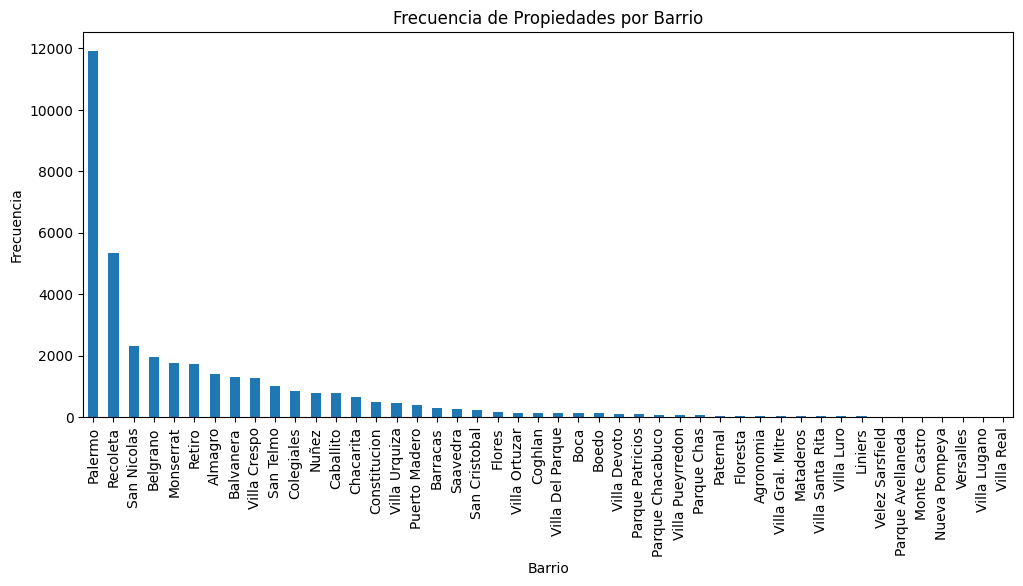

In [521]:
# Gráfico donde se muestran las frecuencias de propiedades por barrio
plt.figure(figsize=(12, 5))
neighbourhood_counts = listings_df['neighbourhood_cleansed'].value_counts()
neighbourhood_counts.plot(kind='bar')
plt.title('Frecuencia de Propiedades por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.show()

De igual forma realizamos un gráfico con el top 10 de de frecuencia de propiedades por barrio para tener un mejor panorama de los datos.

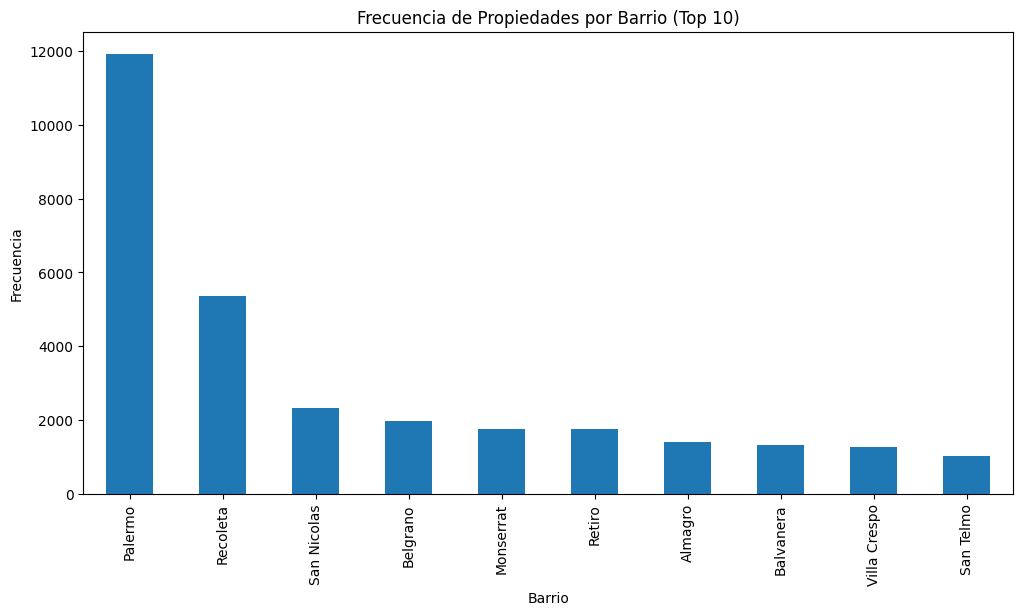

In [522]:
# Gráfico de barras de barrios
plt.figure(figsize=(12, 6))
neighbourhood_counts = listings_df['neighbourhood_cleansed'].value_counts()
neighbourhood_counts.head(10).plot(kind='bar')
plt.title('Frecuencia de Propiedades por Barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.show()

Con los anteriores gráficos vemos la distribución de las propiedades por barrio, con lo que nos da una idea de los barrios donde existen más y menos oferta de propiedades.

**2. Atributo Tipo de Propiedad ('property_type')**

In [523]:
listings_df["property_type"].unique()

array(['Entire condo', 'Entire rental unit',
       'Private room in rental unit', 'Entire loft',
       'Private room in condo', 'Entire serviced apartment',
       'Entire place', 'Private room in home', 'Entire townhouse',
       'Private room in bed and breakfast', 'Entire home',
       'Private room in casa particular', 'Entire villa',
       'Shared room in rental unit', 'Shared room in guest suite',
       'Camper/RV', 'Private room in guesthouse', 'Private room in villa',
       'Private room in serviced apartment', 'Room in hostel',
       'Private room in townhouse', 'Shared room in home',
       'Private room in guest suite', 'Shared room in hostel',
       'Casa particular', 'Room in serviced apartment',
       'Shared room in serviced apartment', 'Shared room in villa',
       'Private room in loft', 'Entire guesthouse',
       'Entire vacation home', 'Room in boutique hotel',
       'Shared room in loft', 'Entire bungalow', 'Room in hotel',
       'Shared room in townhous

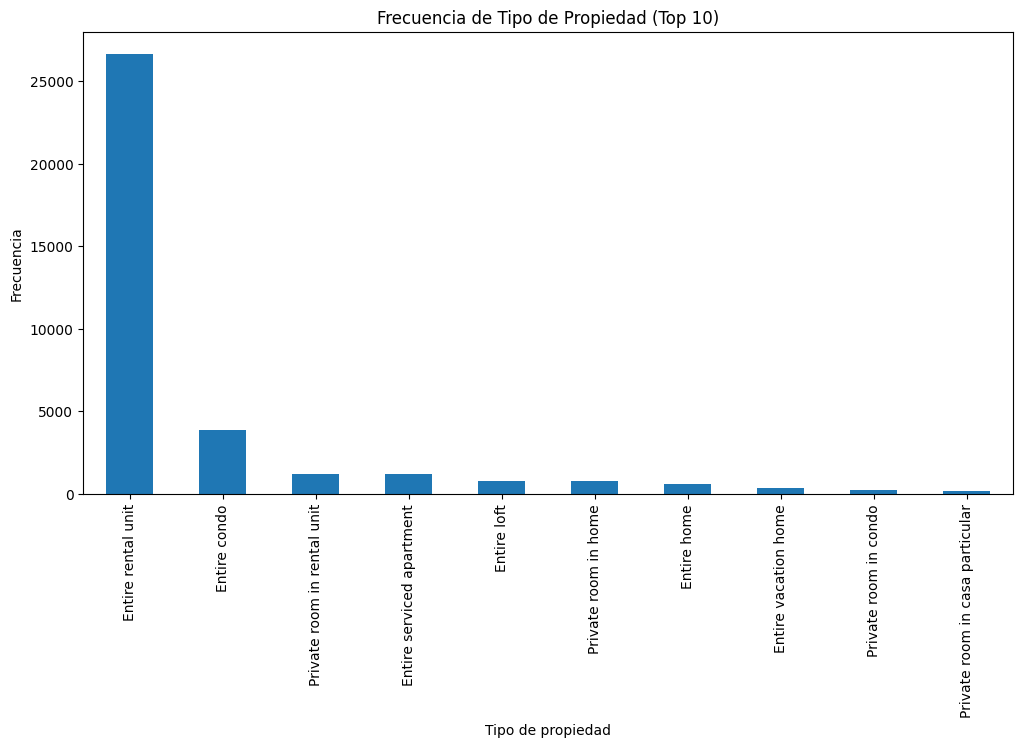

In [524]:
# Gráfico de barras de barrios
plt.figure(figsize=(12, 6))
property_type_counts = listings_df['property_type'].value_counts()
property_type_counts.head(10).plot(kind='bar')
plt.title('Frecuencia de Tipo de Propiedad (Top 10)')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Frecuencia')
plt.show()

A partir de este análisis, podemos observar que alrededor del 60% de las propiedades en la base de datos corresponden a 'entire_rental_unit' información que resultará de valor próximamente al momento de recomendar alternativas de inversión.

## Variables cuantitativas
**3. Atributo precio ('precio')**

Se requiere transformar esta variable antes de analizarla, ya que para poder hacerlo como variable numérica y no como categórica se debe convertir de tipo object a float.

In [525]:
# Se crea la columna con el valor del precio en tipo float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
# Se elimina la columna original del dataframe
listings_df = listings_df.drop("price", axis=1)

KeyError: 'price'

In [ ]:
print(f"median   {listings_df['price_float'].median()}")
print(f"mode     {listings_df['price_float'].mode()[0]}")
print(listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))

median   31718.5
mode     27316.0
count    3.703000e+04
mean     6.324993e+04
std      8.811976e+05
min      2.600000e+02
5%       1.547900e+04
25%      2.367400e+04
50%      3.171850e+04
75%      4.370500e+04
95%      9.924700e+04
max      9.105257e+07
Name: price_float, dtype: float64


In [ ]:
z_scores = stats.zscore(listings_df['price_float'])
df = listings_df[(z_scores < 3) & (z_scores > -3)]

In [ ]:
# Medidas de centralidad y dispersión de 'price'
price_mean = listings_df['price_float'].mean()
price_median = listings_df['price_float'].median()
price_mode = listings_df['price_float'].mode()[0]
price_std = listings_df['price_float'].std()
price_min = listings_df['price_float'].min()
price_max = listings_df['price_float'].max()
price_iqr = listings_df['price_float'].quantile(0.75) - listings_df['price_float'].quantile(0.25)

print(f"Media del precio: {price_mean}")
print(f"Mediana del precio: {price_median}")
print(f"Moda del precio: {price_mode}")
print(f"Desviación estándar del precio: {price_std}")
print(f"Rango de precio: {price_min} - {price_max}")
print(f"Rango Intercuartílico (IQR) del precio: {price_iqr}")

Media del precio: 66096.50389648581
Mediana del precio: 31632.0
Moda del precio: 27316.0
Desviación estándar del precio: 919502.2222414871
Rango de precio: 260.0 - 91052574.0
Rango Intercuartílico (IQR) del precio: 22763.0


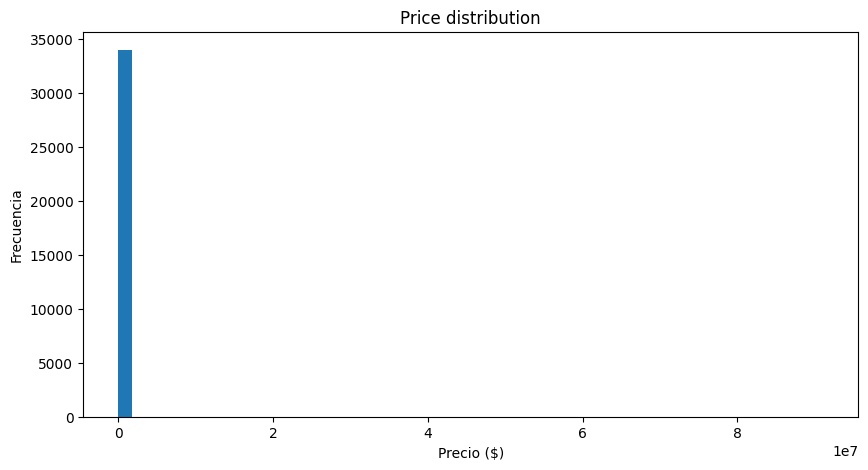

In [ ]:
# Plotting a histogram for price
plt.figure(figsize=(10, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Calcular los cuartiles
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

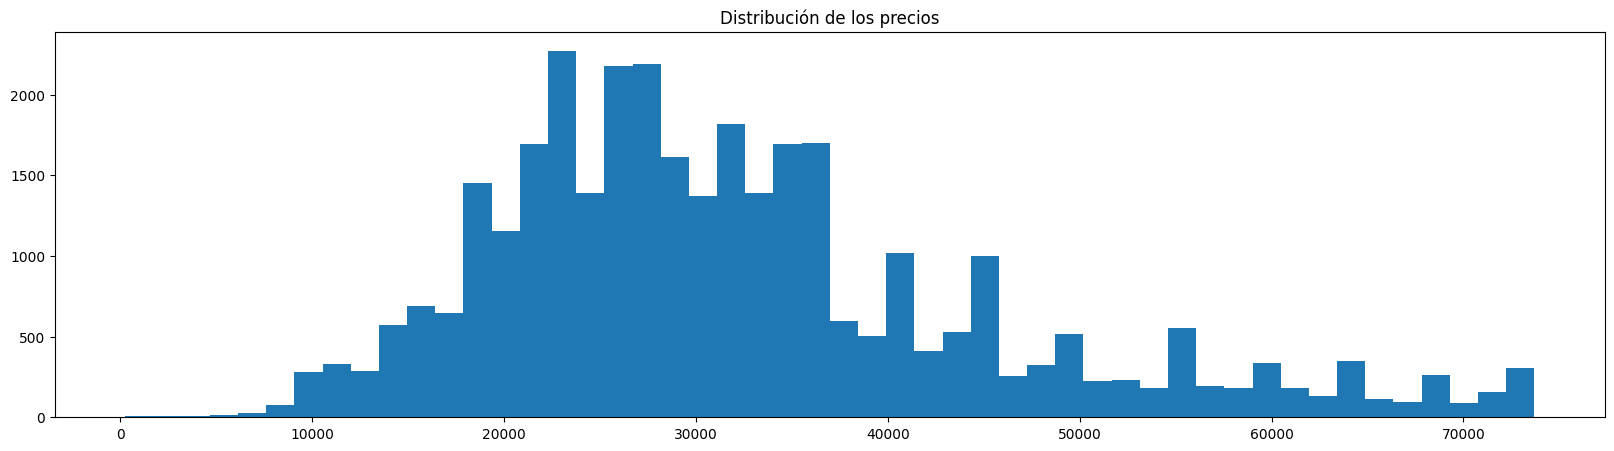

In [ ]:
#Histograma más acotado (sin outliers extremos)
upper_bound = q3 + 1.5 * iqr
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= upper_bound]["price_float"], bins=50)
plt.title("Distribución de los precios")
plt.show()

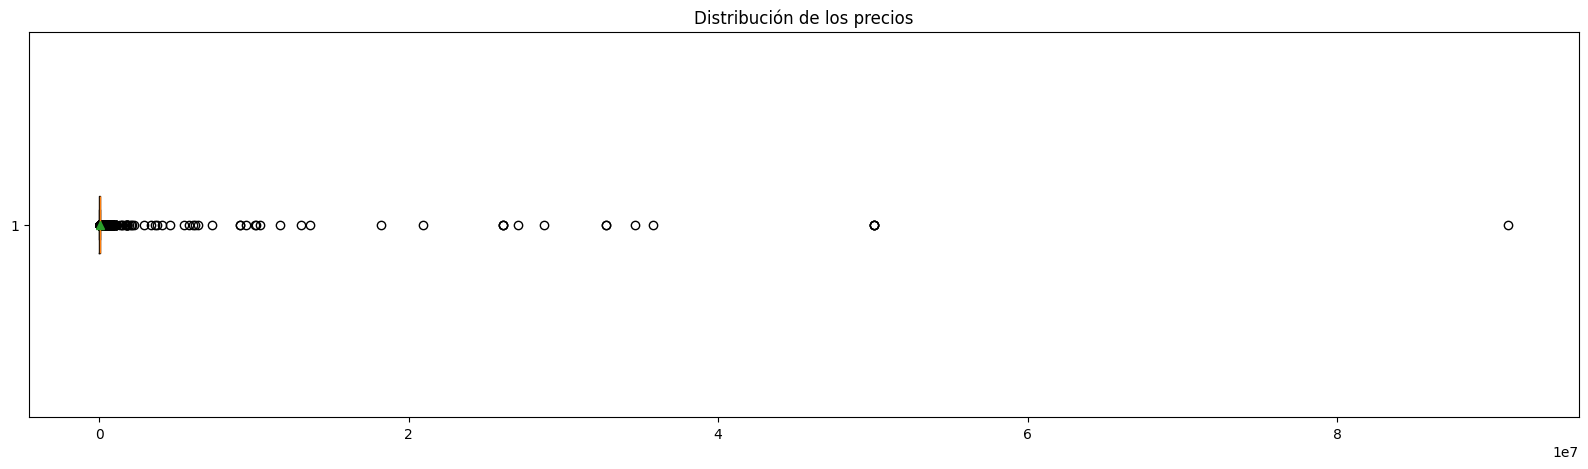

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["price_float"], showmeans=True, vert=False)
plt.title("Distribución de los precios")
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_30728\1748205491.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([listings_df[listings_df['property_type'] == prop]['price'] for prop in listings_df['property_type'].unique()],


TypeError: can only concatenate str (not "float") to str

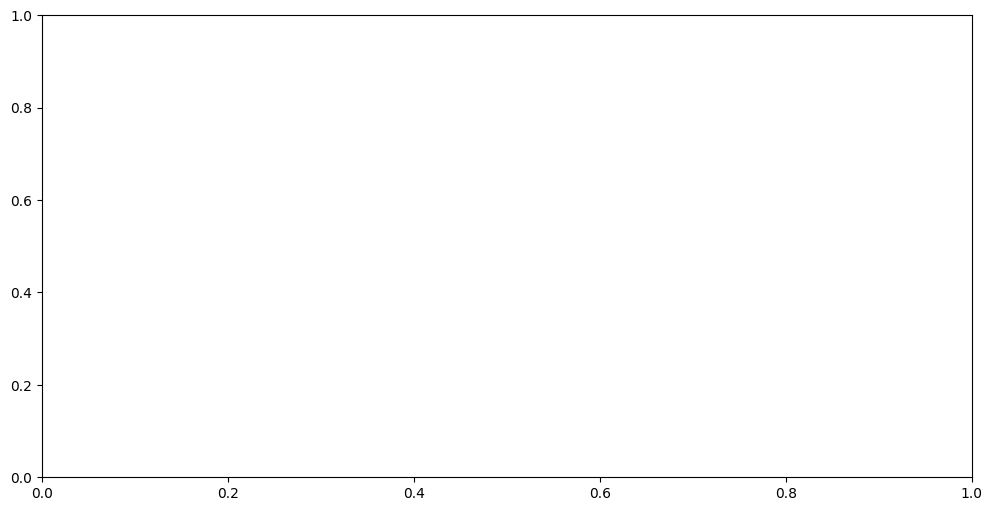

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([listings_df[listings_df['property_type'] == prop]['price'] for prop in listings_df['property_type'].unique()],
            labels=listings_df['property_type'].unique())
plt.title('Boxplot del Precio por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.grid(axis='y')  # Añadir líneas de cuadrícula en el eje y
plt.show()

**4. Atributo Número de Reseñas ('number_of_reviews')**

In [ ]:
listings_df["number_of_reviews"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    37030.000000
mean        23.617229
std         40.532880
min          0.000000
5%           0.000000
25%          1.000000
50%          8.000000
75%         29.000000
95%         96.000000
max        851.000000
Name: number_of_reviews, dtype: float64

In [ ]:
# Calcular los cuartiles
q1 = listings_df["number_of_reviews"].quantile(0.25)
q3 = listings_df["number_of_reviews"].quantile(0.75)
iqr = q3 - q1

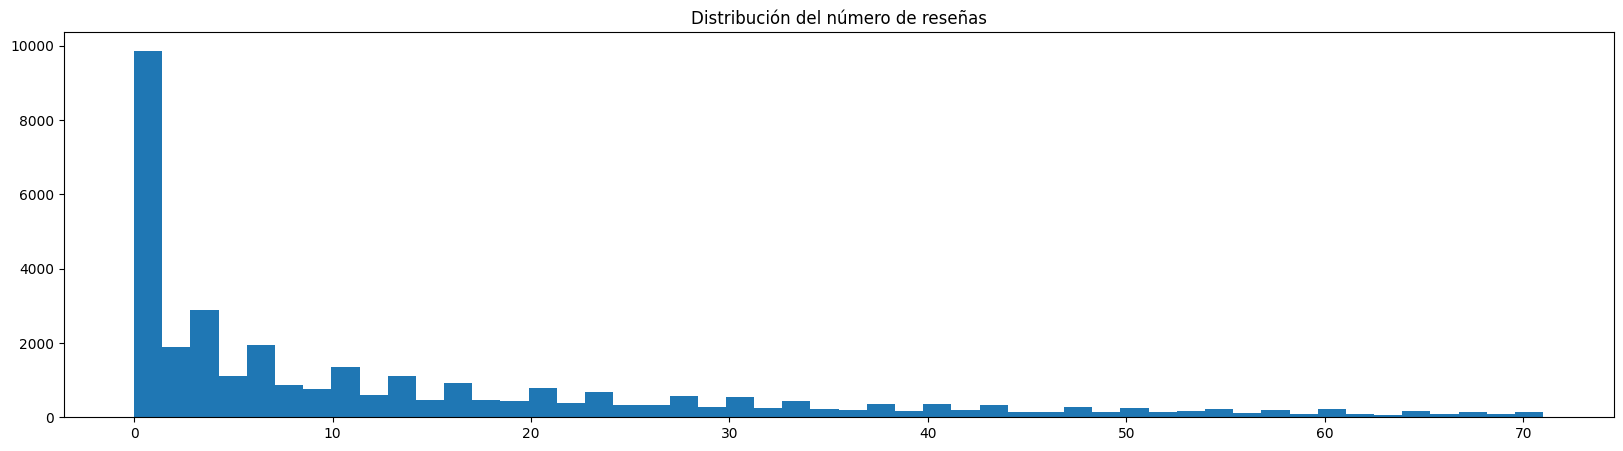

In [ ]:
#Histograma más acotado (sin outliers extremos)
upper_bound = q3 + 1.5 * iqr
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["number_of_reviews"] <= upper_bound]["number_of_reviews"], bins=50)
plt.title("Distribución del número de reseñas")
plt.show()

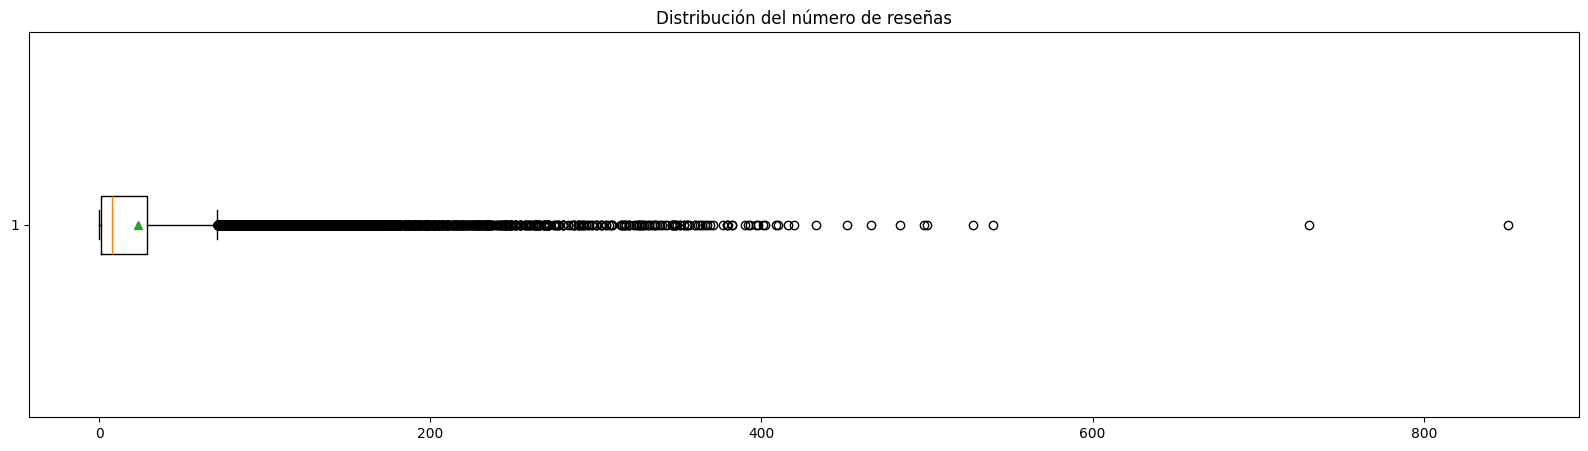

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Distribución del número de reseñas")
plt.show()

**5. Atributo Calificación de Reseña Total ('review_scores_rating')**

In [ ]:
listings_df["review_scores_rating"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    37030.000000
mean         4.806573
std          0.305049
min          0.000000
5%           4.330000
25%          4.770000
50%          4.880000
75%          4.980000
95%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

[]

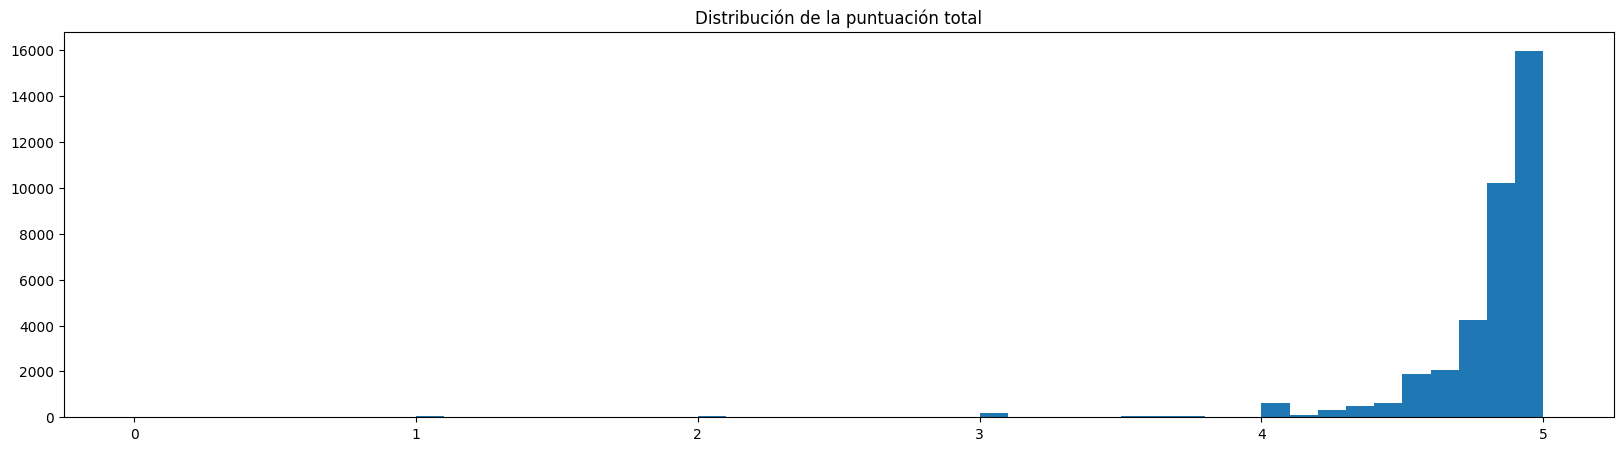

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df["review_scores_rating"], bins=50)
plt.title("Distribución de la puntuación total")
plt.plot()

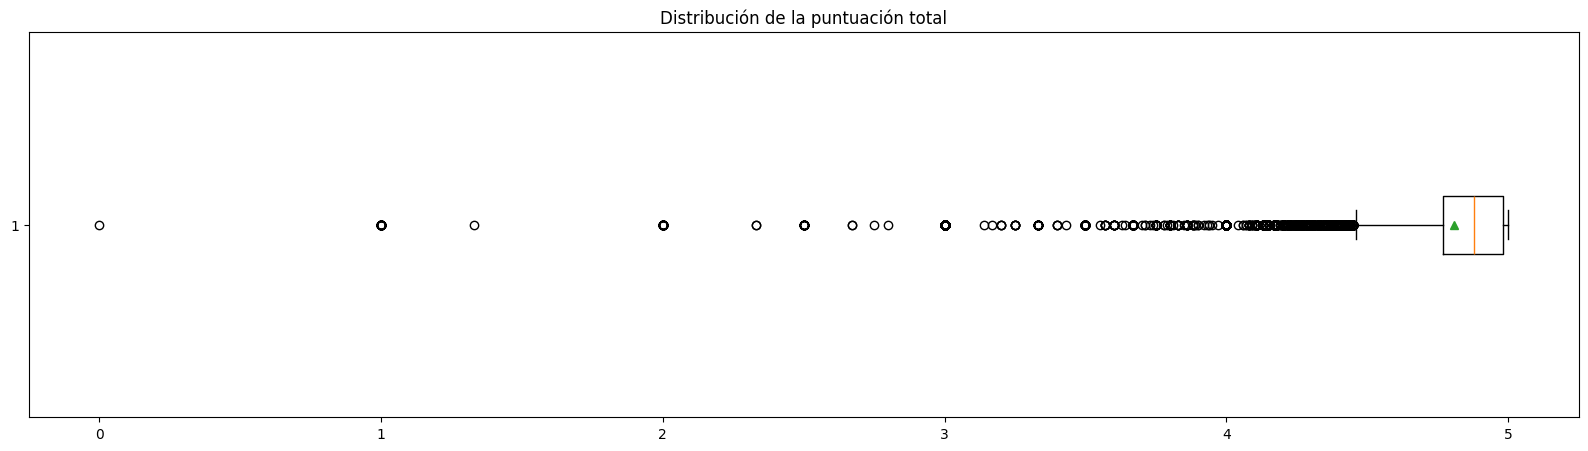

In [ ]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["review_scores_rating"], showmeans=True, vert=False)
plt.title("Distribución de la puntuación total")
plt.show()

### [15%]Estrategia de análisis


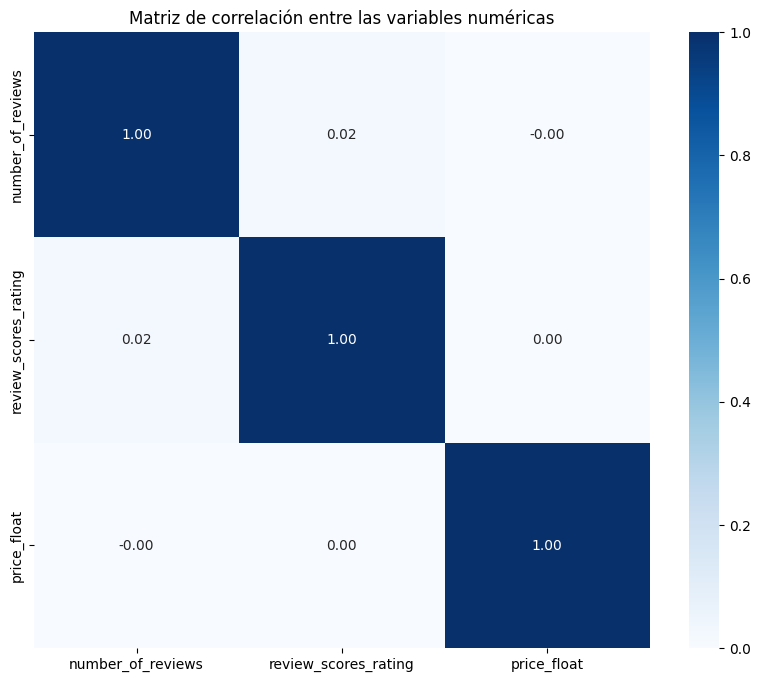

In [ ]:
# Seleccionar solo las columnas numéricas relevantes
numerical_columns = ['number_of_reviews', 'review_scores_rating', 'price_float']
correlation_matrix = listings_df[numerical_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True, vmin=0, vmax=1,)
plt.title('Matriz de correlación entre las variables numéricas')
plt.show()

In [ ]:
# Seleccionar solo las columnas categóricas relevantes
categorical_columns = ['neighbourhood_cleansed', 'property_type']

# Contar la frecuencia de cada barrio
neighbourhood_counts = listings_df['neighbourhood_cleansed'].value_counts()

# Calcular el porcentaje
neighbourhood_percentage = neighbourhood_counts / neighbourhood_counts.sum() * 100

# Calcular el porcentaje acumulado
cumulative_percentage = neighbourhood_percentage.cumsum()

# Crear el gráfico
fig, ax1 = plt.subplots()

# Gráfico de barras
ax1.bar(neighbourhood_counts.index, neighbourhood_percentage, color='b', alpha=0.6, label='Frecuencia (%)')
ax1.set_ylabel('Frecuencia (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(neighbourhood_counts.index, rotation=90)

# Crear un segundo eje y para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(neighbourhood_counts.index, cumulative_percentage, color='r', marker='o', label='Porcentaje Acumulado (%)')
ax2.set_ylabel('Porcentaje Acumulado (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Títulos y leyenda
plt.title('Análisis de Pareto por Barrio')
fig.tight_layout()
plt.show()

### 2. Bivariate analysis

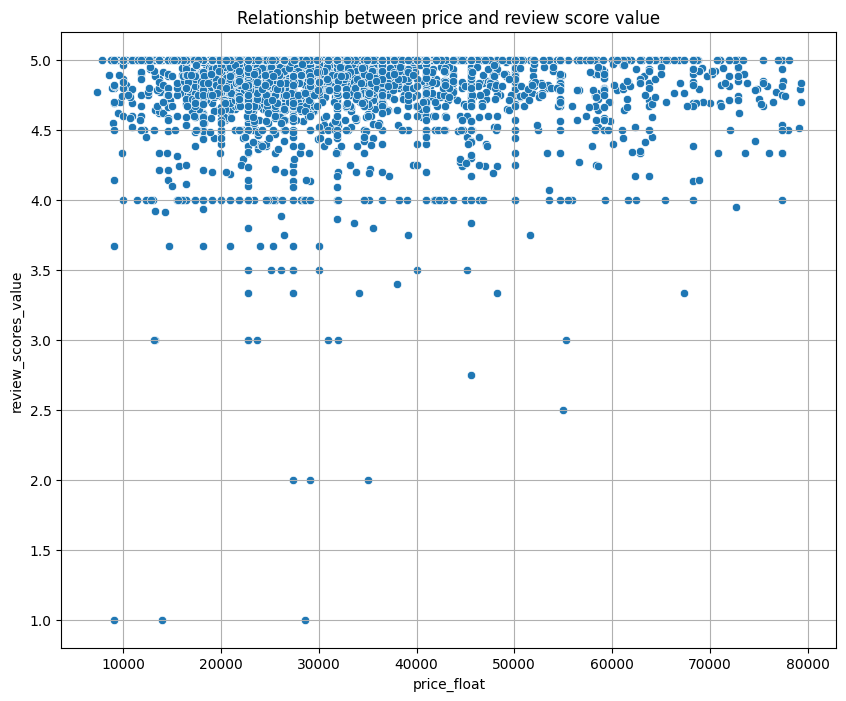

In [ ]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:
# Another common strategy for working with datasets with high variability is by filtering the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

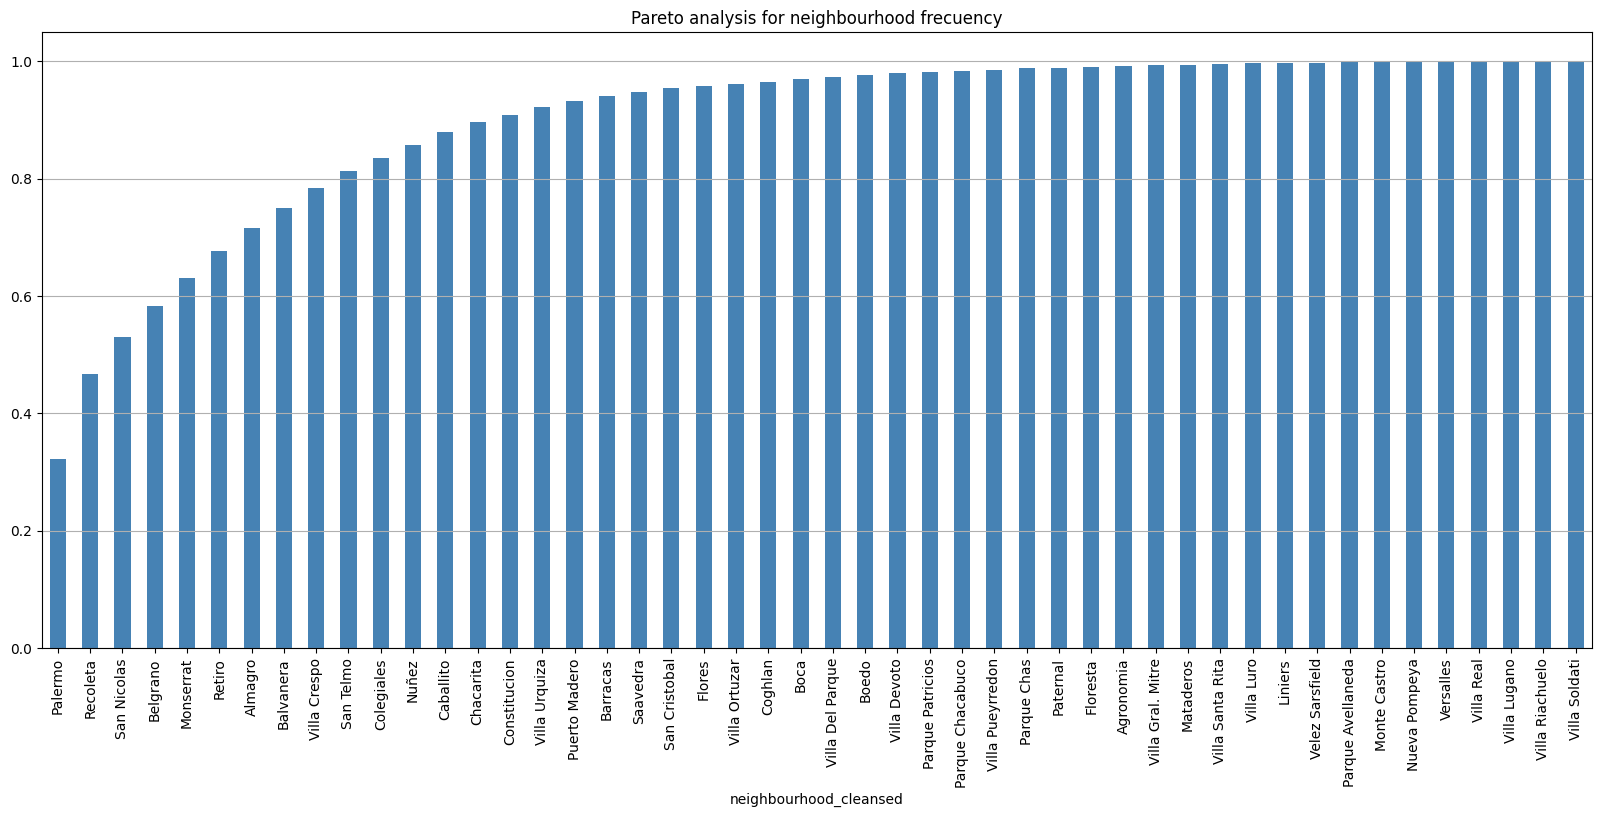

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()